In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

### Disclaimer: due to focusing my efforts on the R delivery, in this notebook I will give minimal context of the data and proceed to just run usual EDA code with no comment. For structured and heavily commented data exploration, please refer to [Section 4](https://pheymanss.github.io/individual_income_model/#exploratory-data-analysis) of the R delivery.

# Unites States Census Bureau - Public Use Microdata Sample


As thoroughly detailed in the accompanying R Markdown and html file, the task given is to build a model for individual income prediction based on the two Public Use Microdata Sample (PUMS) file types: Person and Housing Unit data. On this notebook we will perform some minor exploratory tasks and overview of the Person file, while the entire project excecution is made in R, with an HTML output available [here](http://pheymanss.github.io/individual_income_model). On that report, both datasets were immediately joint as soon as they were loaded. 

### Data dictionaries

The specifications of the columns and values of both the Person and Housing Unit files were placed in a rather cumbersome data dictionary file. For more details on the parsing methodology, see [Section 3.1](http://pheymanss.github.io/individual_income_model#data-dictionary-parsing) of the submission site. Here we will simply load the already parsed dictionaries.

In [2]:
dict_names = pd.read_csv('names.csv')
dict_vals  = pd.read_csv('values.csv')

In [3]:
dict_names.head()

,field_type,column_name,column_type,field_length,description,record_number,dataset
0,NAME,RT,C,1,Record Type,1,H
1,NAME,SERIALNO,C,13,Housing unit/GQ person serial number,2,H
2,NAME,DIVISION,C,1,Division code based on 2010 Census definitions,3,H
3,NAME,PUMA,C,5,Public use microdata area code (PUMA) based on...,4,H
4,NAME,REGION,C,1,Region code based on 2010 Census definitions,5,H


In [4]:
dict_vals.head()

,field_type,column_name,column_type,field_length,starting_value,ending_value,description,record_number,dataset
0,VAL,RT,C,1,H,H,Housing Record or Group Quarters Unit,1,H
1,VAL,RT,C,1,P,P,Person Record,2,H
2,VAL,SERIALNO,C,13,2019GQ0000001,2019GQ9999999,GQ Unique identifier,3,H
3,VAL,SERIALNO,C,13,2019HU0000001,2019HU9999999,HU Unique identifier,4,H
4,VAL,DIVISION,C,1,0,0,Puerto Rico,5,H


As you can see, the structure of both dictionaries is almost identical, with the distinction that in the values dictionary there are two additional columns, which represent either the range or the explicit mapping of each column. 

For instance, on the names dictionary there is a single entry for the column 'RT', and in that entry it gives a description of the file, 'Record Type'. Note that it does not give any technical or methodological detail, just the names. For further context, the Census Bureau has a [helpful site](https://www.census.gov/programs-surveys/cps/technical-documentation/subject-definitions.html) covering most of the relevant definitions used in this dataset.

Then, for that same column 'RT' but on the values dictionary, we see two records: one for the 'H' value that represents it is a Housing Unit Record, and 'P' that represents a Person record. These files are essential to understanding all the content of the two PUMS files.

## Person dataset

In [5]:
# load Person dataset
per = pd.read_csv("Technical Test Data and Information/psam_p48.csv")
per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272776 entries, 0 to 272775
Columns: 288 entries, RT to PWGTP80
dtypes: float64(85), int64(199), object(4)
memory usage: 599.4+ MB


In [6]:
per.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2019GQ0000004,7,1,3301,3,48,1010145,67,25,...,115,66,15,119,67,118,68,15,67,15
1,P,2019GQ0000043,7,1,2319,3,48,1010145,43,19,...,43,45,44,86,45,7,42,7,5,41
2,P,2019GQ0000059,7,1,6900,3,48,1010145,114,38,...,24,25,24,113,112,112,116,112,199,201
3,P,2019GQ0000061,7,1,4302,3,48,1010145,34,66,...,36,9,59,34,63,60,34,60,8,35
4,P,2019GQ0000069,7,1,6500,3,48,1010145,35,29,...,7,35,7,62,36,7,7,36,35,35


We can see that the table has 288 columns, 199 integer columns and 85 floats. Most of those integer columns are coded categorical data, with its corresponding set of values specified. There are a lot of columns that are not relevant to our study, and getting rid of them will clean all future exploratory outputs. These columns are:

* Representativity weight columns for aggregated metrics
* Allocation flags indicating that a value was imputed by the Census Bureau team.

In [7]:
# remove allocation flag columns (according do dict_names description)
flag_cols = [x for x,y,z in zip(dict_names['column_name'],
                                dict_names['description'],
                                dict_names['dataset']) 
             if 'allocation flag' in y and 'P' in z]

per.drop(flag_cols, axis=1, inplace=True)

# remove weight columns
weight_cols = [x for x in per.columns if 'PWGTP' in x]
per.drop(weight_cols, axis=1, inplace=True)

per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272776 entries, 0 to 272775
Columns: 133 entries, RT to FHINS5C
dtypes: float64(85), int64(44), object(4)
memory usage: 276.8+ MB


So, out of the 199 integer columns we had previously, 155 were either weight or flag columns. 

###  We will now proceed with the code shoowcase for data exploration. 
### No further comments on the insights will be made.

In [8]:
per.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,AGEP,CIT,...,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FHINS3C,FHINS4C,FHINS5C
0,P,2019GQ0000004,7,1,3301,3,48,1010145,25,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,P,2019GQ0000043,7,1,2319,3,48,1010145,19,1,...,NaN,NaN,NaN,NaN,373011,NaN,1,NaN,0.0,NaN
2,P,2019GQ0000059,7,1,6900,3,48,1010145,38,4,...,NaN,NaN,NaN,NaN,533030,NaN,3,NaN,NaN,NaN
3,P,2019GQ0000061,7,1,4302,3,48,1010145,66,1,...,NaN,NaN,NaN,NaN,NaN,6.0,1,NaN,NaN,NaN
4,P,2019GQ0000069,7,1,6500,3,48,1010145,29,1,...,NaN,NaN,NaN,NaN,472061,NaN,1,NaN,NaN,NaN


In [9]:
per.describe()

,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,AGEP,CIT,CITWP,COW,...,RC,SCIENGP,SCIENGRLP,SFN,SFR,VPS,WAOB,FHINS3C,FHINS4C,FHINS5C
count,272776.0,272776.000000,272776.000000,272776.0,272776.0,272776.0,272776.000000,272776.000000,17477.000000,159107.000000,...,261900.000000,64690.000000,64690.000000,10386.000000,10386.000000,17820.000000,272776.000000,53215.000000,39681.000000,10767.000000
mean,7.0,2.145387,3681.835187,3.0,48.0,1010145.0,40.169142,1.531293,2000.881959,2.124080,...,0.227564,1.644427,1.897063,1.016176,3.572020,5.910325,1.411121,0.063366,0.107331,0.009381
std,0.0,1.365804,1777.123726,0.0,0.0,0.0,23.531980,1.261813,14.201855,1.913636,...,0.419260,0.478690,0.303879,0.126157,1.575591,3.844870,1.030790,0.243622,0.309537,0.096402
min,7.0,1.000000,100.000000,3.0,48.0,1010145.0,0.000000,1.000000,1944.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.0,1.000000,2308.000000,3.0,48.0,1010145.0,19.750000,1.000000,1993.000000,1.000000,...,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,7.0,2.000000,3801.000000,3.0,48.0,1010145.0,40.000000,1.000000,2004.000000,1.000000,...,0.000000,2.000000,2.000000,1.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.000000
75%,7.0,3.000000,5100.000000,3.0,48.0,1010145.0,60.000000,1.000000,2012.000000,3.000000,...,0.000000,2.000000,2.000000,1.000000,5.000000,7.000000,1.000000,0.000000,0.000000,0.000000
max,7.0,20.000000,6900.000000,3.0,48.0,1010145.0,92.000000,5.000000,2019.000000,9.000000,...,1.000000,2.000000,2.000000,2.000000,6.000000,14.000000,8.000000,1.000000,1.000000,1.000000


In [10]:
per.dtypes.to_frame()

,0
RT,object
SERIALNO,object
DIVISION,int64
SPORDER,int64
PUMA,int64
...,...
VPS,float64
WAOB,int64
FHINS3C,float64
FHINS4C,float64


In [11]:
per.nunique(axis=0).to_frame()

,0
RT,1
SERIALNO,114016
DIVISION,1
SPORDER,20
PUMA,212
...,...
VPS,14
WAOB,8
FHINS3C,2
FHINS4C,2


In [12]:
duplicate_rows = per[per.duplicated()]
duplicate_rows

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,AGEP,CIT,...,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FHINS3C,FHINS4C,FHINS5C


In [13]:
# NULL percentages
per.isnull().sum()/len(per)

RT          0.000000
SERIALNO    0.000000
DIVISION    0.000000
SPORDER     0.000000
PUMA        0.000000
              ...   
VPS         0.934672
WAOB        0.000000
FHINS3C     0.804913
FHINS4C     0.854529
FHINS5C     0.960528
Length: 133, dtype: float64

<AxesSubplot:xlabel='PINCP'>

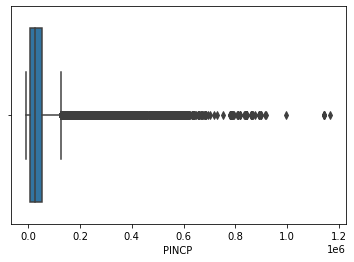

In [14]:
sns.boxplot(x = per['PINCP'])

In [15]:
per.quantile(.25).to_frame()

,0.25
DIVISION,7.0
SPORDER,1.0
PUMA,2308.0
REGION,3.0
ST,48.0
...,...
VPS,2.0
WAOB,1.0
FHINS3C,0.0
FHINS4C,0.0


In [16]:
iqr = per.quantile(.75) - per.quantile(.25)
iqr.to_frame()

,0
DIVISION,0.0
SPORDER,2.0
PUMA,2792.0
REGION,0.0
ST,0.0
...,...
VPS,5.0
WAOB,0.0
FHINS3C,0.0
FHINS4C,0.0


In [17]:
cor = per.select_dtypes(['float']).corr()

<AxesSubplot:>

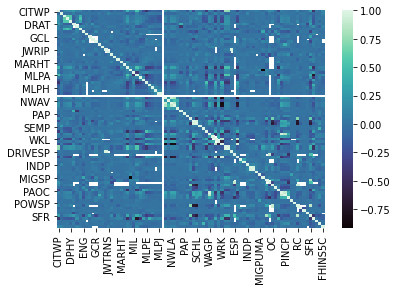

In [18]:
sns.heatmap(cor, cmap='mako')